In [1]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
dir = r"./Data/Dataset_corretto"
train_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Train_set"
test_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Test_set"
valid_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Val_set"

In [5]:
datagen_1 = ImageDataGenerator(
    rescale=1./255,
      
)

In [6]:
train_set = datagen_1.flow_from_directory(
    directory=train_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=(400, 400),
    batch_size=32,
    shuffle=True,
    interpolation="bilinear",

)


valid_set= datagen_1.flow_from_directory(
    directory = valid_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=(400, 400),
    batch_size = 32,    
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    
)

Found 32000 images belonging to 50 classes.
Found 4000 images belonging to 50 classes.


In [48]:

datagen_2= ImageDataGenerator(
    rescale=1./255,
    
)


In [49]:

test_set = datagen_2.flow_from_directory(
    directory = test_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=(400, 400),
    batch_size = 32,
    shuffle=True,
    seed=42,
    interpolation="bilinear"
)



Found 4000 images belonging to 50 classes.


In [72]:
kernel_size = (3,3)


In [73]:
model = Sequential([
    Conv2D(filters=16, kernel_size=kernel_size, activation='relu', input_shape=(400, 400, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(filters=32, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(filters=64, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(filters=128, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(filters=256, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3), 

    Dense(64, activation='relu'),
    Dropout(0.2), 

    Dense(50, activation='softmax')
])

In [74]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [76]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 398, 398, 16)      160       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 199, 199, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 48, 64)      

In [77]:
early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
)

In [78]:
history = model.fit(train_set, epochs=50, validation_data=valid_set, batch_size=32,callbacks = early_stopping)


Epoch 1/50
1000/1000 [==============================] - 88s 87ms/step - loss: 2.9378 - accuracy: 0.1443 - val_loss: 2.1890 - val_accuracy: 0.2918
Epoch 2/50
1000/1000 [==============================] - 85s 85ms/step - loss: 2.2419 - accuracy: 0.2773 - val_loss: 1.8046 - val_accuracy: 0.3988
Epoch 3/50
1000/1000 [==============================] - 85s 85ms/step - loss: 1.9304 - accuracy: 0.3569 - val_loss: 1.5495 - val_accuracy: 0.4560
Epoch 4/50
1000/1000 [==============================] - 85s 85ms/step - loss: 1.7251 - accuracy: 0.4092 - val_loss: 1.4204 - val_accuracy: 0.5050
Epoch 5/50
1000/1000 [==============================] - 86s 86ms/step - loss: 1.5760 - accuracy: 0.4523 - val_loss: 1.2892 - val_accuracy: 0.5322
Epoch 6/50
1000/1000 [==============================] - 87s 87ms/step - loss: 1.4653 - accuracy: 0.4827 - val_loss: 1.2315 - val_accuracy: 0.5435
Epoch 7/50
1000/1000 [==============================] - 87s 87ms/step - loss: 1.3698 - accuracy: 0.5133 - val_loss: 1.1400 -

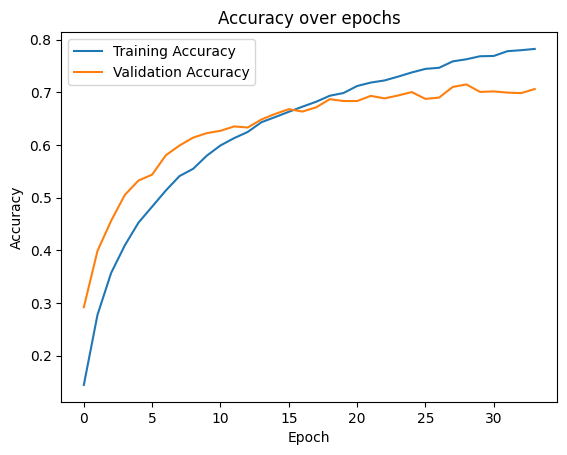

In [80]:

# Accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


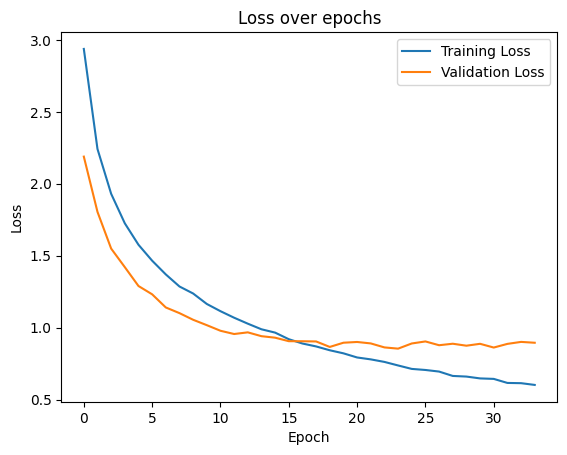

In [81]:
# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [82]:
save = input('vuoi salvare il modello ?')
if save == 'si':
    model.save(filepath=r'C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\model\lego_1_04.keras')
    print('Modello salvato')
else: print('modello non salvato')


Modello salvato
